In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [52]:
from numpy import NaN


def demand_function1(p1, a, b, m, p2):
  """Calculates the demand for good 1 given its price, utility function parameters, income, and price of good 2.

  Args:
    p1: Price of good 1
    a: Coefficient of good X in the utility function.
    b: Coefficient of good Y in the utility function.
    m: Income.
    p2: Price of good 2

  Returns:
    Demand for good 1
  """

  if p1 / p2 > a / b:
    return 0
  else:
    return m / p1

  
def demand_function2(p2, a, b, m, p1):
  """Calculates the demand for good 2 given its price, utility function parameters, income, and price of good 1.

  Args:
    p2: Price of good 2
    a: Coefficient of good X in the utility function.
    b: Coefficient of good Y in the utility function.
    m: Income.
    p1: Price of good 1

  Returns:
    Demand for good 2
  """

  if p1 / p2 < a / b:
    return 0
  else:
    return m / p2
  
# Linear supply function 

def supply_function(p,c1,c2):
  return c1+c2*p

In [53]:
# n=3 case

# u1(x1,x2) = 9x1 + 10x2
# u2(x1,x2) = x1 + 4x2
# u3(x1,x2) = x1 + 15.6x2
# m1=10, m2=20, m3=200
a1,b1 = 9,10
a2,b2 = 1,4
a3,b3 = 1,15.6
m1,m2,m3 = 10,20,200

# equilibrium 1
# p1=10/13, p2=3
# x1=13, x2 = 3
# S1(p1) = 13 + 0 * p1
# S2(p2) = 20/21 + 40/21 * p2
p1_eqm1, p2_eqm1 = 10/13,3

# equilibrium 2: shift D2
# S2_new(p2) = 20/21 + 1520/63 * p2
# p1=30/13, p2=10
# x1=13, x2 = 50/3
p1_eqm2, p2_eqm2 = 30/13,10

In [54]:
# demand for x1
p1_range = np.linspace(0, 10, 1000)

d11_eqm1 = [demand_function1(p1,a1,b1,m1,p2_eqm1) for p1 in p1_range]
d21_eqm1 = [demand_function1(p1,a2,b2,m2,p2_eqm1) for p1 in p1_range]
d31_eqm1 = [demand_function1(p1,a3,b3,m3,p2_eqm1) for p1 in p1_range]

d11_eqm2 = [demand_function1(p1,a1,b1,m1,p2_eqm2) for p1 in p1_range]
d21_eqm2 = [demand_function1(p1,a2,b2,m2,p2_eqm2) for p1 in p1_range]
d31_eqm2 = [demand_function1(p1,a3,b3,m3,p2_eqm2) for p1 in p1_range]

D1_eqm1 = [x11+x21 for x11,x21 in zip(d11_eqm1,d21_eqm1)]
# i3 does not participate in eqm1
D1_eqm2 = [x11+x21+x31 for x11,x21,x31 in zip(d11_eqm2,d21_eqm2,d31_eqm2)]
S1_eqm1 = [supply_function(p1,13,0) for p1 in p1_range]



/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


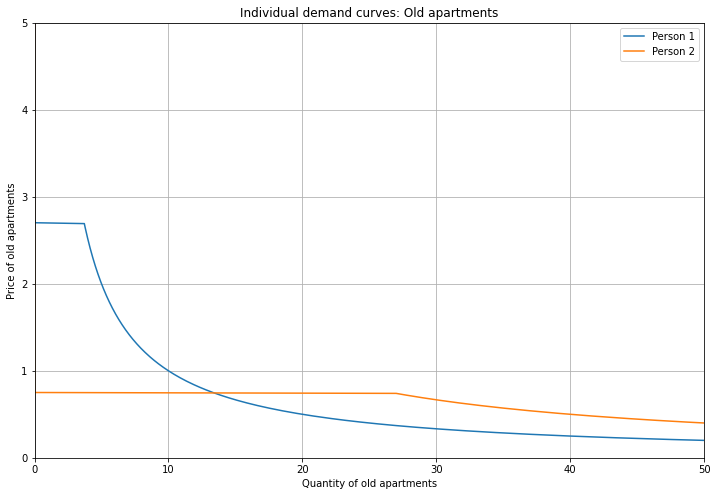

In [61]:
# individual demand curves: x1

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(d11_eqm1, p1_range, label = "Person 1")
plt.plot(d21_eqm1, p1_range, label = "Person 2")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Individual demand curves: Old apartments")
plt.grid(True)
ax.set_ylim(0,5)
ax.set_xlim(0, 50)
plt.legend()
plt.show()

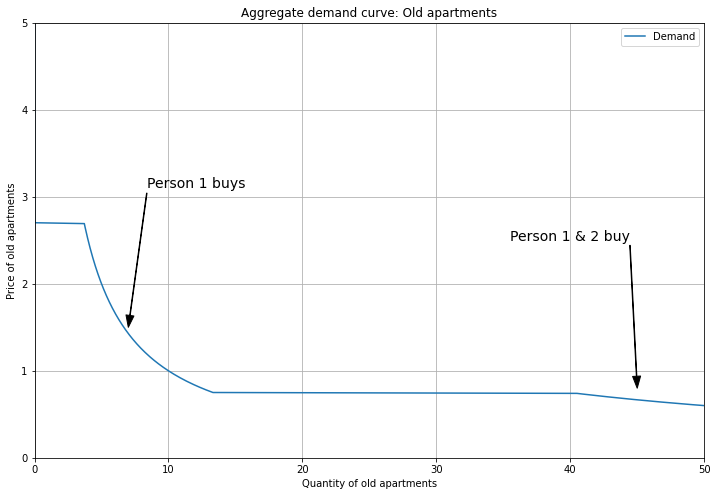

In [58]:
# aggregate demand for x1
# want dotted lines for the slopes to be visible

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D1_eqm1, p1_range, label="Demand")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Aggregate demand curve: Old apartments")
plt.grid(True)
ax.set_xlim(0, 50)
ax.set_ylim(0,5)
plt.legend()

plt.annotate('Person 1 buys',xy=(7,1.5), xytext=(8.4, 3.1), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Person 1 & 2 buy',xy=(45,0.8), xytext=(35.5,2.5), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))


plt.show()

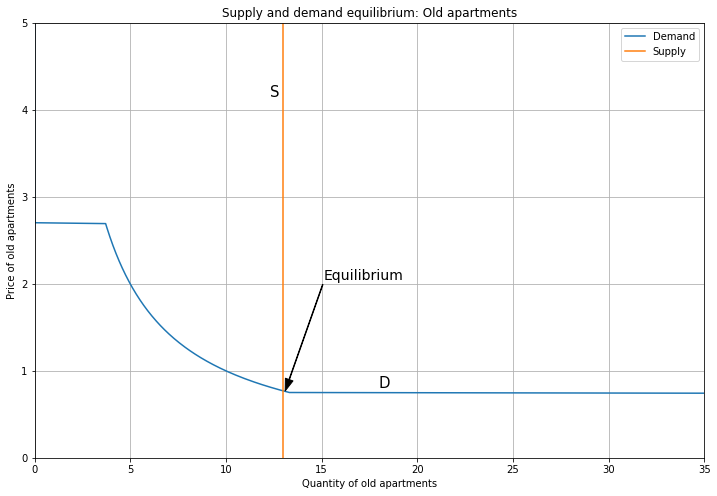

In [262]:
# aggregate demand and supply for x1

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D1_eqm1, p1_range, label="Demand")
plt.plot(S1_eqm1, p1_range, label="Supply")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Supply and demand equilibrium: Old apartments")
plt.grid(True)
ax.set_xlim(0, 35)
ax.set_ylim(0,5)
plt.legend()

plt.annotate('D',xy=(18,0.8), fontsize=15)
plt.annotate('S',xy=(12.3,4.15), fontsize=15)

plt.annotate('Equilibrium',xy=(13.1,10/13), xytext=(15.1,2.05), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))


plt.show()

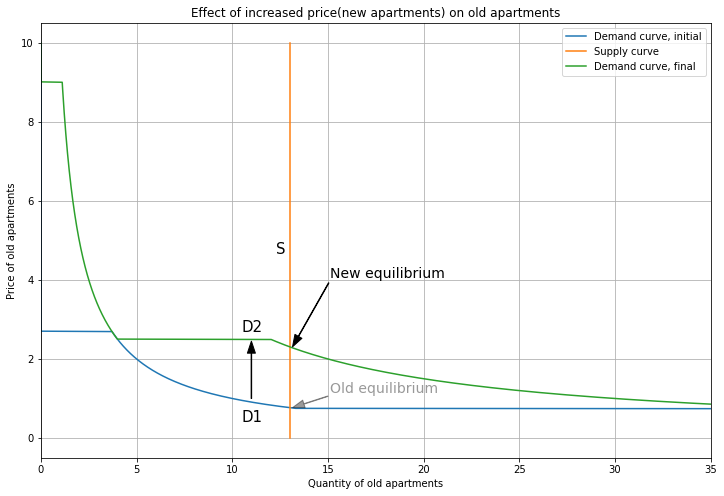

In [275]:
# aggregate demand and supply for x1, eqm 2

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D1_eqm1, p1_range, label="Demand curve, initial")
plt.plot(S1_eqm1, p1_range, label="Supply curve")
plt.plot(D1_eqm2, p1_range, label="Demand curve, final")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Effect of increased price(new apartments) on old apartments")
plt.grid(True)
ax.set_xlim(0, 35)
plt.legend()

# demand shift arrows
plt.annotate('',xy=(11, 2.45), xytext=(11,1),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

# label curves
plt.annotate('D2',xy=(10.5,2.7), fontsize=15)
plt.annotate('D1',xy=(10.5,0.4), fontsize=15)
plt.annotate('S',xy=(12.3,4.65), fontsize=15)

plt.annotate('New equilibrium',xy=(13.15,30/13), xytext=(15.1,4.05), fontsize=14,
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.annotate('Old equilibrium',xy=(13.15,10/13), xytext=(15.1,1.15), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8, alpha=0.4), alpha=0.4)


plt.show()


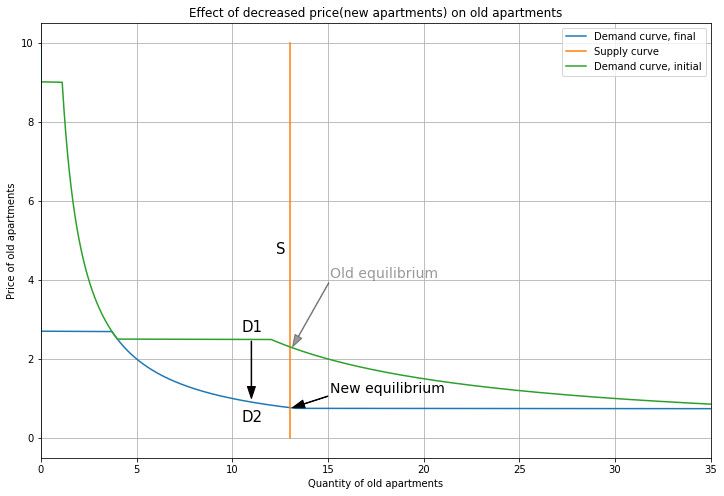

In [283]:
# fishtank: aggregate demand and supply for x1, eqm 3
# reverse price increase, go back to original equilibrium

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D1_eqm1, p1_range, label="Demand curve, final")
plt.plot(S1_eqm1, p1_range, label="Supply curve")
plt.plot(D1_eqm2, p1_range, label="Demand curve, initial")
plt.xlabel("Quantity of old apartments")
plt.ylabel("Price of old apartments")
plt.title("Effect of decreased price(new apartments) on old apartments")
plt.grid(True)
ax.set_xlim(0, 35)
plt.legend()

# demand shift arrows
plt.annotate('',xy=(11,1), xytext=(11,2.45),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

# label curves
plt.annotate('D1',xy=(10.5,2.7), fontsize=15)
plt.annotate('D2',xy=(10.5,0.4), fontsize=15)
plt.annotate('S',xy=(12.3,4.65), fontsize=15)

plt.annotate('Old equilibrium',xy=(13.15,30/13), xytext=(15.1,4.05), fontsize=14,
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8, alpha=0.4), alpha=0.4)

plt.annotate('New equilibrium',xy=(13.15,10/13), xytext=(15.1,1.15), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))


plt.show()


In [279]:
# demand for x2
p2_range = np.linspace(0.1, 15, 1000)

d12_eqm1 = [demand_function2(p2,a1,b1,m1,p1_eqm1) for p2 in p2_range]
d22_eqm1 = [demand_function2(p2,a2,b2,m2,p1_eqm1) for p2 in p2_range]
d32_eqm1 = [demand_function2(p2,a3,b3,m3,p1_eqm1) for p2 in p2_range]

# E2a: using p1(E1)
d12_eqm2a = [demand_function2(p2,a1,b1,m1,p1_eqm1) for p2 in p2_range]
d22_eqm2a = [demand_function2(p2,a2,b2,m2,p1_eqm1) for p2 in p2_range]
d32_eqm2a = [demand_function2(p2,a3,b3,m3,p1_eqm1) for p2 in p2_range]

# E2b: using p1(E2)
d12_eqm2b = [demand_function2(p2,a1,b1,m1,p1_eqm2) for p2 in p2_range]
d22_eqm2b = [demand_function2(p2,a2,b2,m2,p1_eqm2) for p2 in p2_range]
d32_eqm2b = [demand_function2(p2,a3,b3,m3,p1_eqm2) for p2 in p2_range]

D2_eqm1 = [x12+x22 for x12,x22 in zip(d12_eqm1,d22_eqm1)]
# i3 is not in eqm1
D2_eqm2a = [x12+x22+x32 for x12,x22,x32 in zip(d12_eqm2a,d22_eqm2a,d32_eqm2a)]
D2_eqm2b = [x12+x22+x32 for x12,x22,x32 in zip(d12_eqm2b,d22_eqm2b,d32_eqm2b)]
S2_eqm1 = [supply_function(p2,20/21,40/21) for p2 in p2_range]
S2_eqm2 = [supply_function(p2,20/21,1520/63) for p2 in p2_range]

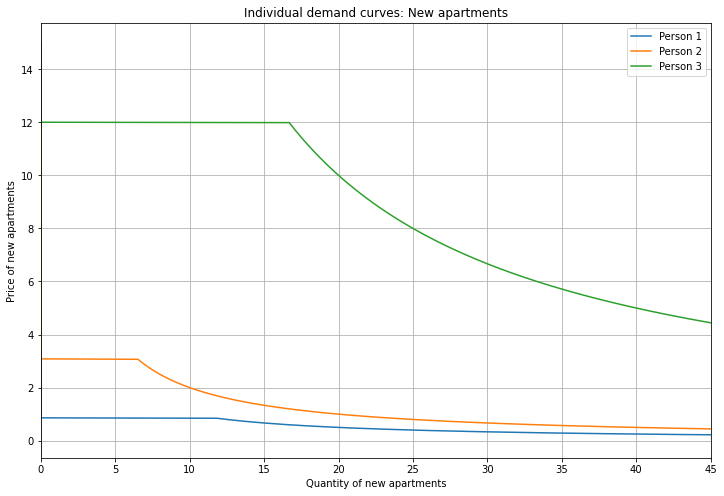

In [265]:
# individual demand curves: x2

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(d12_eqm1, p2_range, label = "Person 1")
plt.plot(d22_eqm1, p2_range, label = "Person 2")
plt.plot(d32_eqm1, p2_range, label = "Person 3")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Individual demand curves: New apartments")
plt.grid(True)
ax.set_xlim(0, 45)
plt.legend()
plt.show()

In [170]:
# # individual demand curves: x2
# # i2 and i3, calibrate m3 so that S intersects such that E1 has i2 buying, and E2 has i3 buying
# # note: d22_eqm1 and d22_eqm2a overlap

# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(1,1,1)
# # plt.plot(d22_eqm1, p2_range, label = "Person 2, E1")
# plt.plot(d22_eqm2a, p2_range, label = "Person 2, E2")
# plt.plot(d32_eqm2a, p2_range, label = "Person 3")
# plt.xlabel("Quantity of new apartments")
# plt.ylabel("Price of new apartments")
# plt.title("Individual demand curves: New apartments")
# plt.grid(True)
# ax.set_xlim(0, 45)
# # ax.set_xlim(0, 25)
# plt.legend()
# plt.show()

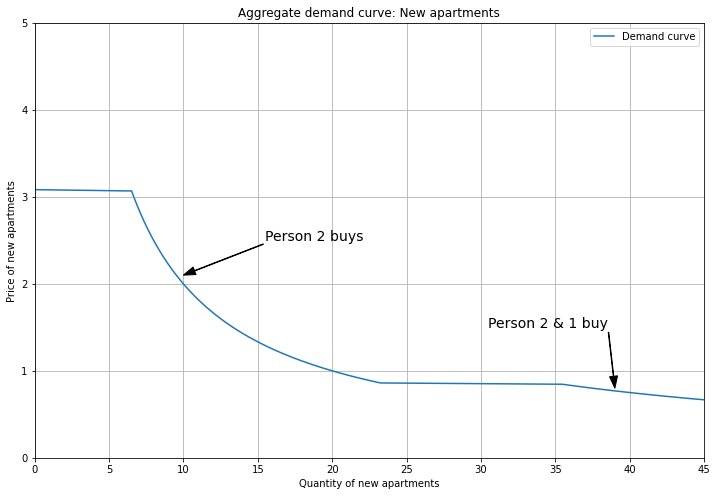

In [266]:
# aggregate demand for x2
# eqm1: i3 excluded

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D2_eqm1, p2_range, label="Demand curve")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Aggregate demand curve: New apartments")
plt.grid(True)
ax.set_xlim(0, 45)
ax.set_ylim(0, 5)
plt.legend()

plt.annotate('Person 2 buys',xy=(10,2.1), xytext=(15.5,2.5), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))
plt.annotate('Person 2 & 1 buy',xy=(39,0.8), xytext=(30.5,1.5), fontsize=14, 
        arrowprops=dict(facecolor='black', width=0.5, headwidth=8))


plt.show()

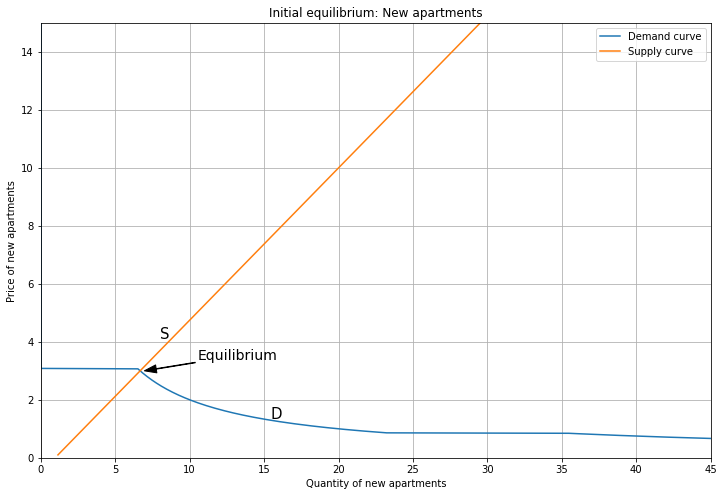

In [270]:
# aggregate supply and demand for x2
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D2_eqm1, p2_range, label="Demand curve")
plt.plot(S2_eqm1, p2_range, label="Supply curve")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Initial equilibrium: New apartments")
plt.grid(True)
ax.set_xlim(0, 45)
ax.set_ylim(0, 15)
plt.legend()

# label curves
plt.annotate('D',xy=(15.4,1.35), fontsize=15)
plt.annotate('S',xy=(8,4.1), fontsize=15)

plt.annotate('Equilibrium',xy=(6.95,3), xytext=(10.5,3.4), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))


plt.show()

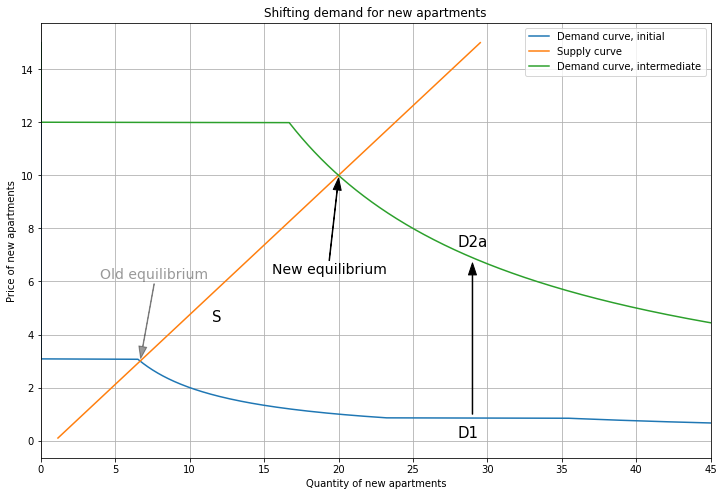

In [268]:
# shift demand for x2
# use p1(E1): shift in D2, before accounting for effects of higher p1

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D2_eqm1, p2_range, label="Demand curve, initial")
plt.plot(S2_eqm1, p2_range, label="Supply curve")
plt.plot(D2_eqm2a, p2_range, label="Demand curve, intermediate")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Shifting demand for new apartments")
plt.grid(True)
ax.set_xlim(0, 45)
plt.legend()

# demand shift arrow
plt.annotate('',xy=(29,6.7), xytext=(29, 1),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

# label curves
plt.annotate('S',xy=(11.5,4.5), fontsize=15)
plt.annotate('D1',xy=(28,0.1), fontsize=15)
plt.annotate('D2a',xy=(28,7.3), fontsize=15)

plt.annotate('Old equilibrium',xy=(6.7,3.1), xytext=(4, 6.1), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8, alpha=0.4), alpha=0.4)
plt.annotate('New equilibrium',xy=(20,9.9), xytext=(15.5, 6.3), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.show()

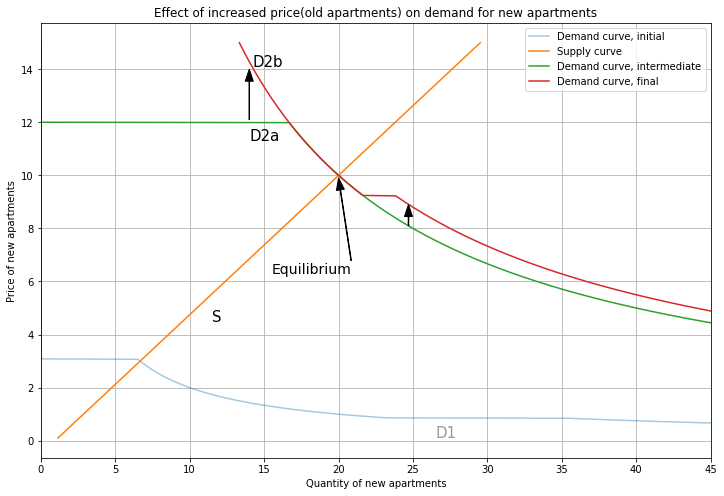

In [286]:
# new equilibrium
    # shift demand up (from adding i3), then up again (from increase in p1)
    # need eqm2 to be consistent for both p1(E1) and p1(E2)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D2_eqm1, p2_range, label="Demand curve, initial", alpha=0.4)
plt.plot(S2_eqm1, p2_range, label="Supply curve")
plt.plot(D2_eqm2a, p2_range, label="Demand curve, intermediate")
plt.plot(D2_eqm2b, p2_range, label="Demand curve, final")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Effect of increased price(old apartments) on demand for new apartments")
plt.grid(True)
ax.set_xlim(0,45)
plt.legend()

# demand shift arrow
plt.annotate('',xy=(14,14), xytext=(14, 12.1),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))
plt.annotate('',xy=(24.7,8.9), xytext=(24.7, 8.1),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

# label curves
plt.annotate('S',xy=(11.5,4.5), fontsize=15)
plt.annotate('D1',xy=(26.5,0.1), fontsize=15, alpha=0.4)
plt.annotate('D2a',xy=(14,11.3), fontsize=15)
plt.annotate('D2b',xy=(14.2,14.1), fontsize=15)

plt.annotate('Equilibrium',xy=(20,9.9), xytext=(15.5, 6.3), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.show()

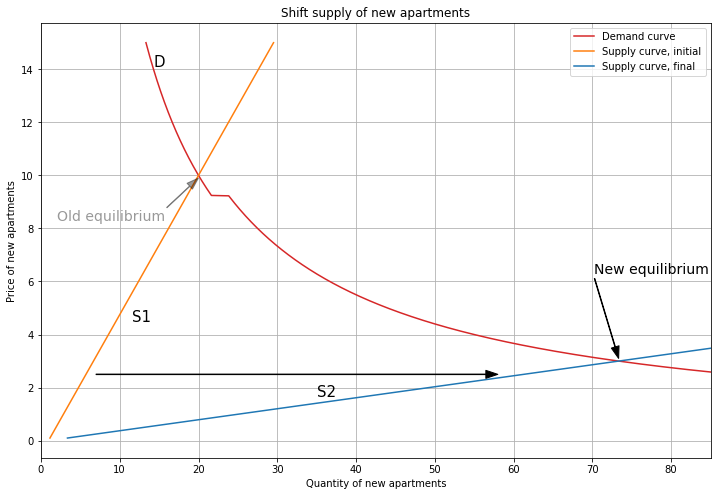

In [331]:
# fishtank: increase supply of old apartments, absorb new demand
# reverse effects of demand increase

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(D2_eqm2b, p2_range, label="Demand curve", color='tab:red')
plt.plot(S2_eqm1, p2_range, label="Supply curve, initial", color='tab:orange')
plt.plot(S2_eqm2, p2_range, label="Supply curve, final")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Shift supply of new apartments")
plt.grid(True)
ax.set_xlim(0, 85)
plt.legend()

# supply shift arrow
plt.annotate('',xy=(58,2.5), xytext=(7,2.5),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

# label curves
plt.annotate('S1',xy=(11.5,4.5), fontsize=15)
plt.annotate('S2',xy=(35,1.65), fontsize=15)
plt.annotate('D',xy=(14.3,14.1), fontsize=15)

plt.annotate('Old equilibrium',xy=(20,9.9), xytext=(2, 8.3), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8, alpha=0.4), alpha=0.4)

plt.annotate('New equilibrium',xy=(220/3,3.1), xytext=(70.2, 6.3), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.show()

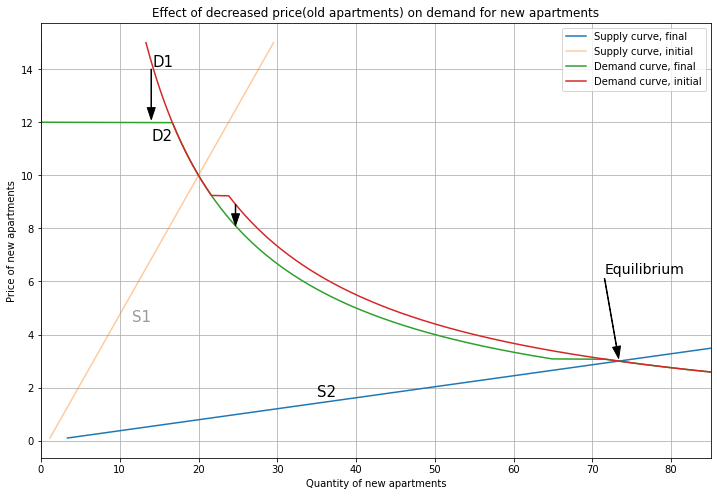

In [330]:
# fishtank: increase supply of old apartments, absorb new demand
# reverse effects of demand increase

# new equilibrium
    # shift demand up (from adding i3), then up again (from increase in p1)
    # need eqm2 to be consistent for both p1(E1) and p1(E2)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
plt.plot(S2_eqm2, p2_range, label="Supply curve, final")
plt.plot(S2_eqm1, p2_range, label="Supply curve, initial", alpha=0.4)
plt.plot(D2_eqm2a, p2_range, label="Demand curve, final")
plt.plot(D2_eqm2b, p2_range, label="Demand curve, initial")
plt.xlabel("Quantity of new apartments")
plt.ylabel("Price of new apartments")
plt.title("Effect of decreased price(old apartments) on demand for new apartments")
plt.grid(True)
ax.set_xlim(0, 85)
plt.legend()

# demand shift arrow
plt.annotate('',xy=(14, 12.1), xytext=(14,14),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))
plt.annotate('',xy=(24.7, 8.1), xytext=(24.7,8.9),arrowprops=dict(
    facecolor='black', width=0.5, headwidth=8))

# # label curves
plt.annotate('S1',xy=(11.5,4.5), fontsize=15, alpha=0.4)
plt.annotate('S2',xy=(35,1.65), fontsize=15)
plt.annotate('D2',xy=(14,11.3), fontsize=15)
plt.annotate('D1',xy=(14.2,14.1), fontsize=15)

plt.annotate('Equilibrium',xy=(220/3,3.1), xytext=(71.5, 6.3), fontsize=14,
             arrowprops=dict(facecolor='black', width=0.5, headwidth=8))

plt.show()